# Predicting Who Survived the Sinking of Titanic
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### 1. Problem Definition
What sorts of people were more likely to survive using passenger data (ie name, age, gender, socio-economic class, etc)

### 2. Data
https://www.kaggle.com/c/titanic/data

* titanic-train.csv: 12 columns and 891 rows
* titanic-test.csv: 11 columns (minus Survived column) and 418 rows

### 3. Evaluation
The evaluation metric is accuracy

### 4. Features
* PassengerId: passenger id
* Survived: survival. 0=no, 1=yes
* Pclass: ticket class. 1=1st(upper), 2=2nd(middle), 3=3rd(lower)
* Name: passenger name
* Sex: male or female
* Age: age in years
* Sibsp: # of siblings/spouses aboard the ship. Sibling=brother, sister, stepbrother, stepsister; spouse=husband or wife
* Parch: # of parents/children aboard the ship. Parent=father or mother; child=son, daughter, stepson, stepdaughter; parch=0 if children travelled with a nanny
* Ticket: ticket number
* Fare: passenger fare
* Cabin: cabin number
* Embarked: port of embarkation. C=cherbourg, Q=queenstown, S=southampton

## EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('viridis')

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/jafar-shodiq/mlearning-proj/main/project/who-survived-titanic/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

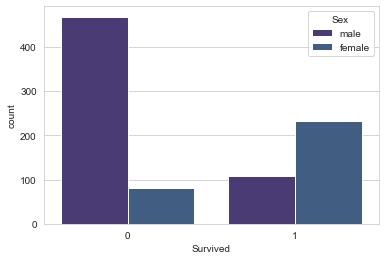

In [15]:
sns.countplot(x='Survived', data=data, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

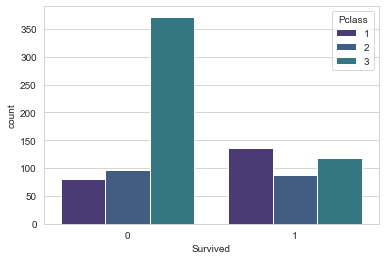

In [16]:
sns.countplot(x='Survived', data=data, hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

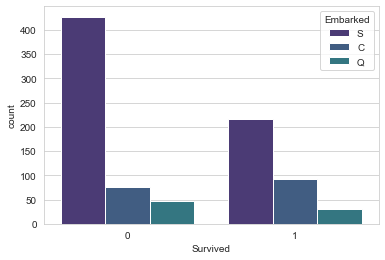

In [17]:
sns.countplot(x='Survived', data=data, hue='Embarked')

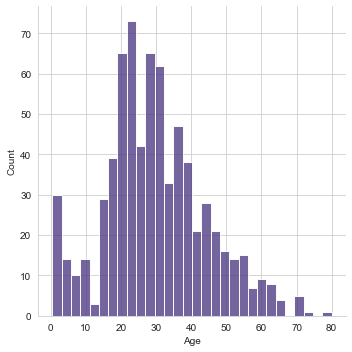

In [21]:
sns.displot(x='Age', data=data, bins=30)

## Dealing with missing data

In [22]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

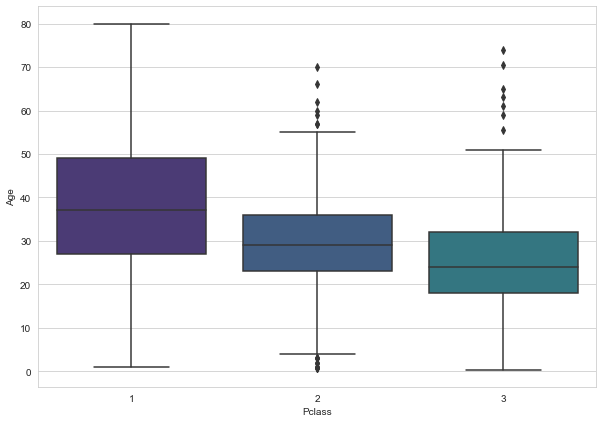

In [24]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=data)

Instead of just fill all of the the missing age with mean values, I could  fill them with mean values based of each passenger classes.

In [25]:
age1 = data['Age'][data['Pclass']==1].mean()
age2 = data['Age'][data['Pclass']==2].mean()
age3 = data['Age'][data['Pclass']==3].mean()
age1, age2, age3

(38.233440860215055, 29.87763005780347, 25.14061971830986)

In [26]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age